# here graphs of non-spatial nature are produced

In [164]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

# graphs for all WWTPS

In [165]:
# read non=spatial data for introduction
data=pd.read_excel('final/database.xlsx')
data.year=data.year.astype(int)


In [166]:
#make sure to insert IDs in workflows for missign states
#data[(data.tech_type=='Primary')&(data.year>1995)&(data.PE>50)].to_excel('compliance_big.xlsx')

In [167]:
#avoid extreme dates
mask1=data.year<2077
mask2=data.year>1899
data=data[(mask1 & mask2)]

# aggregate by size
small=data[data.PE<=50]
medium=data[data.PE>50]
sizes=[small,medium]



In [168]:
small.PE.sum()

257027

In [169]:
#s=small.groupby('BL').agg({'year':'count','PE':'sum'}).reset_index().rename(columns={'year':'WWTPs'})
#m=medium.groupby('BL').agg({'year':'count','PE':'sum'}).reset_index().rename(columns={'year':'WWTPs'})

In [170]:
#extra=small.groupby('BL').agg({'year':'count','PE':'sum'}).reset_index()
#extra.rename(columns={'year':'WWTPs'},inplace=True)
#extra.to_csv('extra_small.csv')


# by tech type and time


In [171]:
# aggregate by tech type
data_tech=data.groupby(['tech_type','year']).count().reset_index()
data_tech=data_tech.pivot('year','tech_type','PE')
#rename columns with proper techtypes
#ASP: activated sludge process, SFB: submerged fixed bed, TF: trickling filter, Construcuted wetland
types={'Bel.':'CAS','Fest':'SFB','Tropf':'TF','PKA':'CW','BKF':'BF'}
data_tech.rename(columns=types,inplace=True)
# reomve minor categories to avoid color overload
data_tech.drop(columns=['Filtration','MBR','Tauch','RBC','Other'],inplace=True)

# show all sizes by techtype

Text(0.5, 0, 'year of construction')

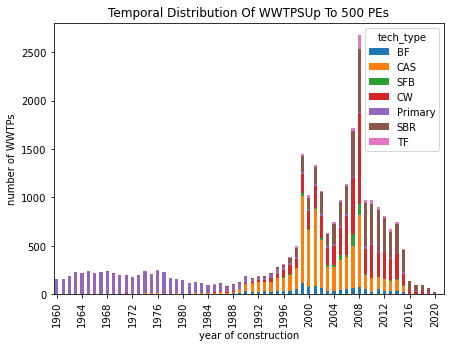

In [172]:
zoom_tech=data_tech.loc[1960:,:]
fig, ax= plt.subplots(1, figsize=(7,5))
zoom_tech.drop(columns='Unknown').plot.bar(stacked=True,ax=ax)
plt.locator_params(axis="x", nbins=20)
ax.set_title('temporal distribution of'.title() +' WWTPS'+'up to 500 '.title()+'PEs')
plt.ylabel('number of WWTPs')
plt.xlabel('year of construction')

# only primary

In [173]:
data[data.tech_type=='Primary'].PE.sum()


81377

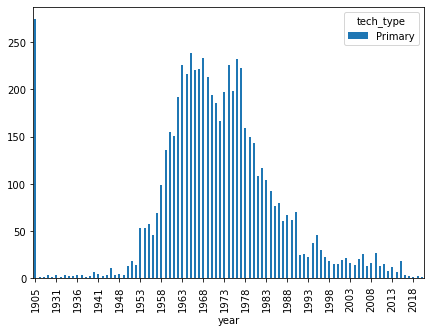

In [174]:
# select only primary
only_nonitri=data.groupby(['tech_type','year']).count().reset_index()
only_nonitri=only_nonitri[only_nonitri.tech_type=='Primary']
only_nonitri=only_nonitri.pivot('year','tech_type','PE')

fig, ax= plt.subplots(1, figsize=(7,5))
only_nonitri.plot.bar(ax=ax)
plt.locator_params(axis="x", nbins=20)

# aggregate by size, tech type and year

In [175]:
small_tech=small.groupby(['tech_type','year']).count().reset_index()
small_tech=small_tech.pivot('year','tech_type','PE')

#ASP: activated sludge process, SFB: submerged fixed bed, TF: trickling filter, Construcuted wetland
types={'Bel.':'CAS','Fest':'SFB','Tropf':'TF','PKA':'CW','BKF':'BF'}
small_tech.rename(columns=types,inplace=True)
# reomve minor categories to avoid color overload
small_tech.drop(columns=['Filtration','MBR','Tauch','RBC','Other'],inplace=True)
small_tech=small_tech.loc[1960:,:]

medium_tech=medium.groupby(['tech_type','year']).count().reset_index()
medium_tech=medium_tech.pivot('year','tech_type','PE')
#ASP: activated sludge process, SFB: submerged fixed bed, TF: trickling filter, Construcuted wetland
types={'Bel.':'CAS','Fest':'SFB','Tropf':'TF','PKA':'CW','BKF':'BF'}
medium_tech.rename(columns=types,inplace=True)

# reomve minor categories to avoid color overload
medium_tech.drop(columns=['MBR','RBC','Other', 'Unknown'],inplace=True)


In [176]:
title_small='< 50 PE'
title_big='51-500 PE'

# put <50 and >50 side by side ? by tech type 

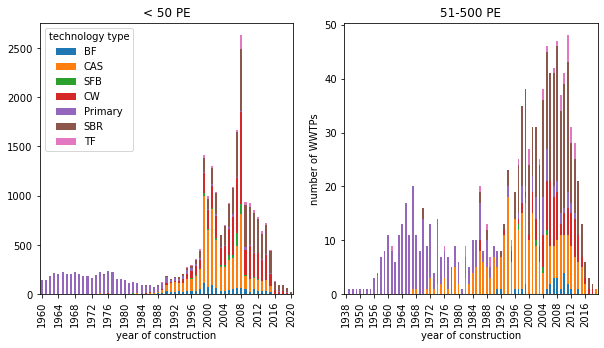

In [177]:
fig, ax= plt.subplots(1,2 ,figsize=(10,5))
small_tech.drop(columns='Unknown').plot.bar(ax=ax[0],stacked=True)
medium_tech.plot.bar(ax=ax[1], legend=False,stacked=True)
plt.ylabel('number of WWTPs')
ax[0].set_xlabel('year of construction')
ax[1].set_xlabel('year of construction')
ax[0].set_title(title_small)
ax[1].set_title(title_big)
#plt.suptitle('temporal distribution of'.capitalize() +' WWTPs'+' up to 500'+'PE')
ax[0].legend(title='technology type')
ax[0].locator_params(axis="x", nbins=20)
ax[1].locator_params(axis="x", nbins=20)

plt.savefig('graphs/temporal_tech.png', bbox_inches='tight' )

Text(0.5, 0, 'year of construction')

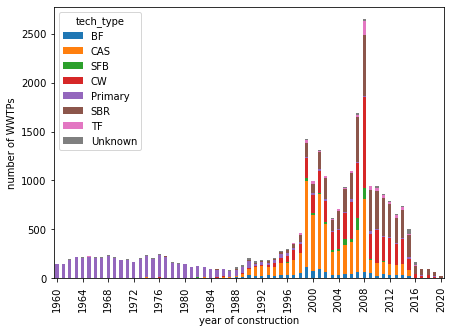

In [178]:
small_tech=small_tech.loc[1960:,:]
fig, ax= plt.subplots(1, figsize=(7,5))
small_tech.plot.bar(stacked=True,ax=ax)
plt.locator_params(axis="x", nbins=20)
#ax.set_title('temporal distribution of'.title() +' WWTPS'+'up to 50 '.title()+'PEs')
plt.ylabel('number of WWTPs')
plt.xlabel('year of construction')

Text(0.5, 0, 'year of construction')

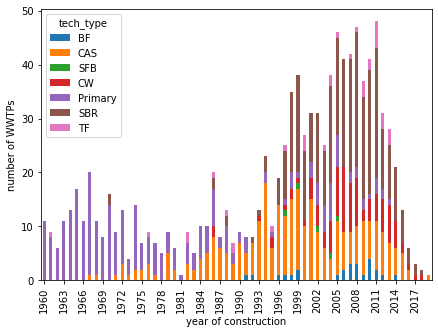

In [179]:
medium_tech=medium_tech.loc[1960:,:]
fig, ax= plt.subplots(1, figsize=(7,5))
medium_tech.plot.bar(stacked=True,ax=ax)
plt.locator_params(axis="x", nbins=20)
#ax.set_title('temporal distribution of'.title() +' WWTPS'+'up 50- 500 '.title()+'PEs')
plt.ylabel('number of WWTPs')
plt.xlabel('year of construction')

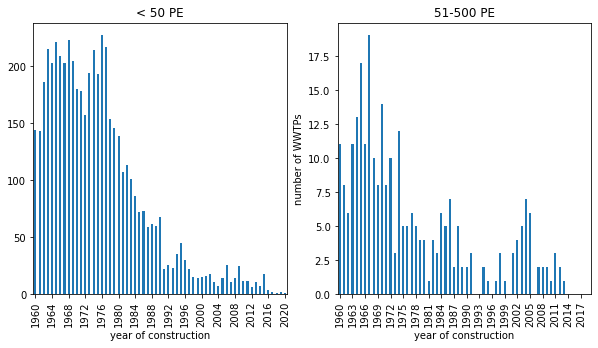

In [180]:
fig, ax= plt.subplots(1,2 ,figsize=(10,5))
small_tech['Primary'].plot.bar(ax=ax[0],stacked=True)
medium_tech['Primary'].plot.bar(ax=ax[1], legend=False,stacked=True)
plt.ylabel('number of WWTPs')
ax[0].set_xlabel('year of construction')
ax[1].set_xlabel('year of construction')
ax[0].set_title(title_small)
ax[1].set_title(title_big)
#plt.suptitle('temporal distribution of only primary'.capitalize() +' WWTPs'+' up to 500'+'PE')
#ax[0].legend(title='technology type')
ax[0].locator_params(axis="x", nbins=20)
ax[1].locator_params(axis="x", nbins=20)

plt.savefig('graphs/temporal_primary.png', bbox_inches='tight' )

# show percentages of tech_type total

In [181]:
test_small=small.groupby('tech_type').count()['PE'].reset_index()
test_small['%freq_small']=test_small.PE.transform(lambda x: 100*x/x.sum())
test_medium=medium.groupby('tech_type').count()['PE'].reset_index()
test_medium['%freq_medium']=test_medium.PE.transform(lambda x: 100*x/x.sum())
percentage=pd.merge(test_small, test_medium, on='tech_type').rename(columns={'PE_x':'freq_small','PE_y':'freq_medium'})

test_small=small.groupby('tech_type').sum()['PE'].reset_index()
test_small['%PE_small']=test_small.PE.transform(lambda x: 100*x/x.sum())
test_medium=medium.groupby('tech_type').sum()['PE'].reset_index()
test_medium['%PE_medium']=test_medium.PE.transform(lambda x: 100*x/x.sum())
percentage
merge2=pd.merge(test_small, test_medium, on='tech_type')
percentage=pd.merge(percentage, merge2, on='tech_type')

In [182]:
to_plot=percentage.pivot_table(columns='tech_type',values=['%freq_small', '%freq_medium','%PE_small', '%PE_medium'])
types={'Bel.':'CAS','Fest':'SFB','Tropf':'TF','PKA':'CW','BKF':'BF'}
to_plot.rename(columns=types,inplace=True)

# which one makes more sense?

# percentage of techtype by size

In [183]:
to_plot

tech_type,BF,CAS,SFB,MBR,Other,CW,Primary,RBC,SBR,TF,Unknown
%PE_medium,1.601765,24.240731,0.510307,0.048957,1.778587,6.116196,20.762465,0.398569,29.988884,2.235329,12.318210
%PE_small,4.816615,27.674914,1.656635,0.095321,0.910410,19.762904,17.635890,0.303081,22.859466,2.235174,1.844553
%freq_medium,2.017756,23.486683,0.403551,0.080710,1.937046,8.071025,24.616626,0.645682,25.343019,2.824859,10.573043
%freq_small,4.515112,25.645540,1.723885,0.095364,0.795921,20.470217,22.340816,0.205399,19.692635,1.962295,2.307072


In [184]:
to_plot.rename(columns={'ASP':'CAS'},inplace=True)

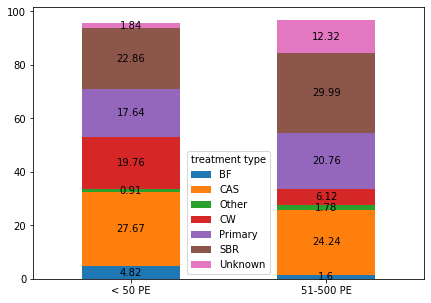

In [185]:
fig, ax= plt.subplots(1, figsize=(7,5))
to_plot.drop(columns=['MBR','SFB','TF','RBC']).loc[['%PE_small','%PE_medium'],:].plot.bar(ax=ax,stacked=True, align='center')
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [round(v.get_height(),2) if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')


#labels = [item.get_text() for item in ax.get_xticklabels()]

ax.set_xticklabels([title_small,title_big])
ax.legend(title='treatment type')
plt.xticks(rotation=0)

plt.savefig('graphs/percentage_tech.png', bbox_inches='tight' )

# show construction history


In [186]:
#aggregate by strate and year
data_all=data[data.year>1945].groupby(['BL','year']).count().reset_index()
data_all=data_all.pivot('year','BL','PE')



# development by state and year

Text(0.5, 1.0, 'Temporal Distribution Of WWTPSUp To 500 PEs')

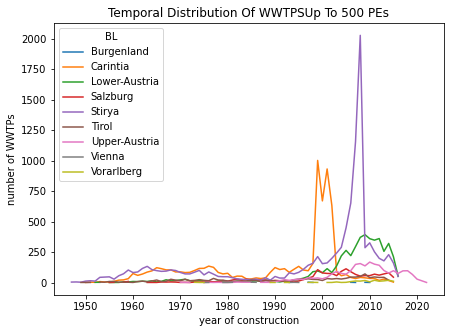

In [187]:
fig, ax= plt.subplots(1, figsize=(7,5))
lines=data_all.plot(ax=ax)
plt.ylabel('number of WWTPs')
plt.xlabel('year of construction')

ax.set_title('temporal distribution of'.title() +' WWTPS'+'up to 500 '.title()+'PEs')


# show only recent history

In [188]:
only_recent=data_all.loc[1990:,:]

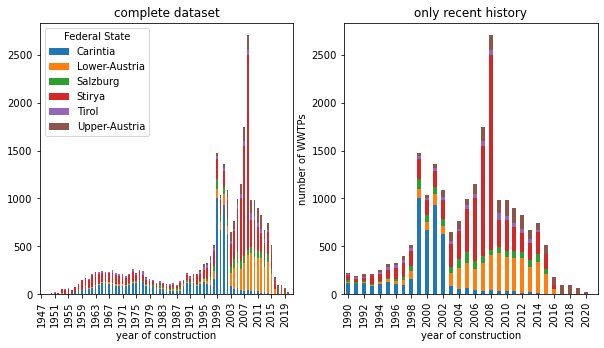

In [189]:
fig, ax= plt.subplots(1,2 ,figsize=(10,5))
data_all.drop(columns=['Burgenland','Vienna','Vorarlberg']).plot.bar(ax=ax[0],stacked=True)
only_recent.drop(columns=['Burgenland','Vienna','Vorarlberg']).plot.bar(ax=ax[1], legend=False,stacked=True)

plt.ylabel('number of WWTPs')
ax[0].set_xlabel('year of construction')
ax[1].set_xlabel('year of construction')
ax[0].set_title('complete dataset')
ax[1].set_title('only recent history')
#plt.suptitle('temporal distribution of'.capitalize() +' WWTPs'+' up to 500'+'PE')
ax[0].legend(title='Federal State')
ax[0].locator_params(axis="x", nbins=20)
ax[1].locator_params(axis="x", nbins=20)

plt.savefig('graphs/temporal.png', bbox_inches='tight' )

In [137]:
connection_rate=pd.Series({1971:49,1981:59,1991:71,2001:87,2010:94,2016:95})

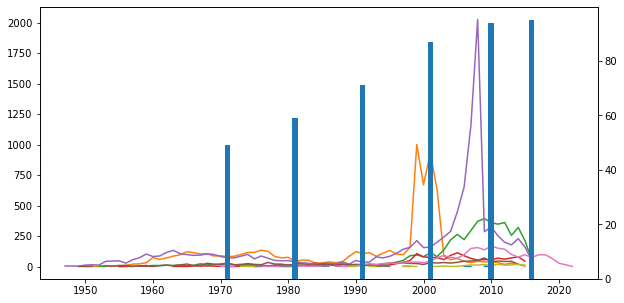

In [138]:
fig, ax= plt.subplots(figsize=(10,5))
ax.plot(data_all)
ax2=ax.twinx()
ax2.bar(connection_rate.index,connection_rate)
plt.savefig('graphs/temporal_connection.png', bbox_inches='tight' )

In [139]:
data_all['connrate']=connection_rate

In [140]:
only_major=data_all.drop(columns=['Burgenland', 'Vienna', 'Vorarlberg'])
only_recent_major=only_recent.drop(columns=['Burgenland', 'Vienna', 'Vorarlberg'])

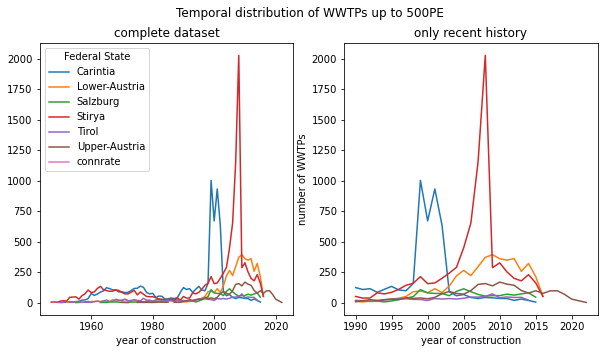

In [141]:
fig, ax= plt.subplots(1,2 ,figsize=(10,5))
only_major.plot(ax=ax[0])
only_recent_major.plot(ax=ax[1], legend=False)
plt.ylabel('number of WWTPs')
ax[0].set_xlabel('year of construction')
ax[1].set_xlabel('year of construction')
ax[0].set_title('complete dataset')
ax[1].set_title('only recent history')
plt.suptitle('temporal distribution of'.capitalize() +' WWTPs'+' up to 500'+'PE')
ax[0].legend(title='Federal State')
plt.savefig('graphs/temporal.png', bbox_inches='tight' )

# put into size categories

# main exapnsion at same time from 1990
# stiria invested in small, while NOE in medium


# by tech_type
## have some data problem: 0s and un-unified categories

# PE workflow

In [142]:
data=gpd.read_file('final/complete.geojson')

In [143]:
#PE workflow
data_BL=data.groupby('BL').sum().reset_index()#[['BL','PE_nonitri_tot','sum_PE_tot','no_nitri_tot','freq_tot']]
data_BL['%BL_PE_nonitri']=data_BL.PE_nonitri_tot/data_BL.sum_PE_tot*100
data_BL['%BL_PE_nonitri_small']=data_BL.PE_nonitri_small/data_BL.sum_PE_tot*100
data_BL['%BL_PE_nonitri_medium']=data_BL.PE_nonitri_medium/data_BL.sum_PE_tot*100
data_BL['%BL_PE_nonitri_medium_excl']=data_BL.PE_nonitri_medium/data_BL.sum_PE_medium*100

#number of infra workflow
data_BL['%BL_nonitri']=data_BL.no_nitri_tot/data_BL.freq_tot*100
data_BL['%BL_nonitri_small']=data_BL.no_nitri_small/data_BL.freq_tot*100 
data_BL['%BL_nonitri_medium']=data_BL.no_nitri_medium/data_BL.freq_tot*100
data_BL['%BL_nonitri_medium_excl']=data_BL.no_nitri_medium/data_BL.freq_medium*100

In [144]:
data_BL[['sum_PE_medium', 'sum_PE_small',
       'sum_PE_tot']]

,sum_PE_medium,sum_PE_small,sum_PE_tot
0,37909.066667,59923.493151,97832.559817
1,77210.000000,37533.000000,114743.000000
2,10076.133333,20260.826667,30336.960000
3,7242.000000,79653.000000,86895.000000
4,23677.693333,8707.533333,32385.226667
5,20742.000000,27430.000000,48172.000000


In [145]:
data[data.BL=='Upper-Austria'].no_nitri_tot.sum()

368.0

### number of WWTPS

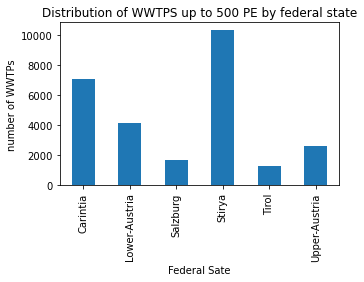

In [146]:
#number of infra
fig, ax= plt.subplots(1, figsize=(5,3))
data_BL.plot.bar(x='BL',y=['freq_tot'], ax=ax)
plt.ylabel('number of WWTPs')
plt.xlabel('Federal Sate')
ax.set_title('distribution of'.capitalize() +' WWTPS'+' up to 500'+' PE'+' by federal state')
ax.get_legend().remove()
plt.savefig('graphs/freq_BL.png', bbox_inches='tight')



### number of PEs

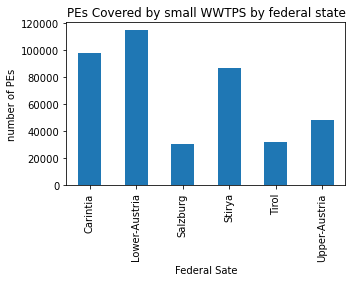

In [147]:
fig, ax= plt.subplots(1, figsize=(5,3))
data_BL.plot.bar(x='BL',y='sum_PE_tot', ax=ax)
plt.ylabel('number of PEs')
plt.xlabel('Federal Sate')
ax.set_title('PEs '+ 'covered by small'.capitalize() +' WWTPS by federal state')
ax.get_legend().remove()
plt.savefig('graphs/PE_sum_BL.png', bbox_inches='tight')


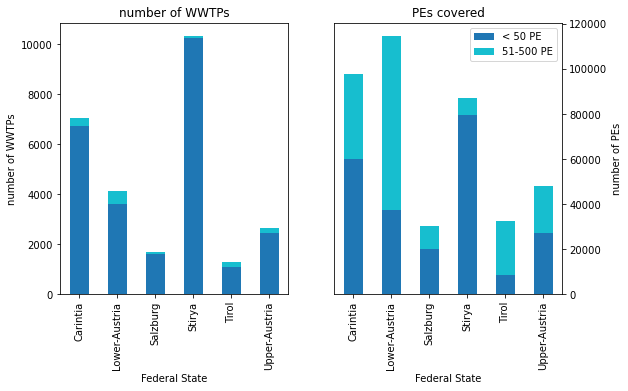

In [148]:
fig, ax= plt.subplots(1,2, figsize=(9,5))
data_BL.plot(kind='bar', y=['sum_PE_small','sum_PE_medium'],x='BL',
                    stacked=True, 
                    colormap='tab10',ax=ax[1])
ax[1].set_ylabel('number of PEs')
ax[1].set_xlabel('Federal State')
ax[1].set_title('PEs '+ 'covered')
#ax[1].get_legend().remove()
#fig.suptitle('Distribution of WWTPs up to 500 PEs by federal state')
data_BL.plot(kind='bar', y=['freq_small','freq_medium'],x='BL',
                    stacked=True, 
                    colormap='tab10',ax=ax[0])
ax[0].set_ylabel('number of WWTPs')
ax[0].set_xlabel('Federal State')
ax[0].set_title('number of WWTPs')
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
legend_labels=[title_small ,title_big]
for a in ax:
    a.legend(legend_labels)
ax[0].legend().set_visible(False)
#ax[0].get_legend().remove()
plt.savefig('graphs/freq_BL+sum_PE.png', bbox_inches='tight')

# see size difference

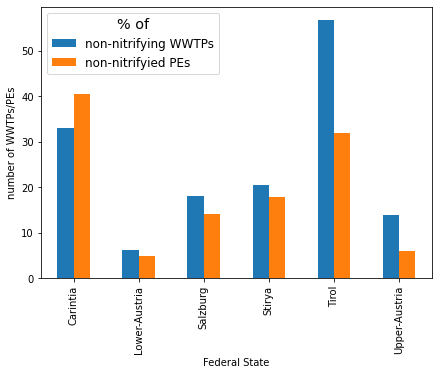

In [149]:
#% of non nitrifying infra and not nitirifie PE
fig, ax= plt.subplots(1, figsize=(7,5))
data_BL.plot.bar(x='BL', y=['%BL_nonitri','%BL_PE_nonitri'],ax=ax)
plt.ylabel('number of WWTPs/PEs')
plt.xlabel('Federal State')
#ax.set_title(' Percentage of Non-nitrifyied'.capitalize() +' PEs and WWTPS by federal state')
ax.legend(['non-nitrifying WWTPs','non-nitrifyied PEs'], title='% of', title_fontsize='x-large', fontsize='large')
plt.savefig('graphs/%nonitri+%PE_nonitri_BL.png', bbox_inches='tight')



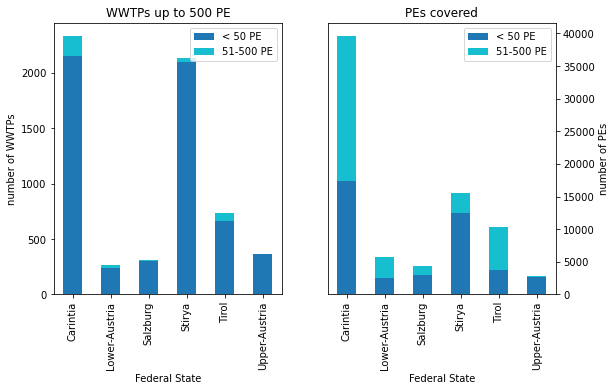

In [150]:
fig, ax= plt.subplots(1,2, figsize=(9,5))
data_BL.plot(kind='bar', y=['PE_nonitri_small','PE_nonitri_medium'],x='BL',
                    stacked=True, 
                    colormap='tab10',ax=ax[1])
ax[1].set_ylabel('number of PEs')
ax[1].set_xlabel('Federal State')
ax[1].set_title('PEs '+ 'covered')
#ax[1].get_legend().remove()
#fig.suptitle('Distribution of non nitrifying WWTPs up to 500 PEs by federal state')
data_BL.plot(kind='bar', y=['no_nitri_small','no_nitri_medium'],x='BL',
                    stacked=True, 
                    colormap='tab10',ax=ax[0])
ax[0].set_ylabel('number of WWTPs')
ax[0].set_xlabel('Federal State')
ax[0].set_title('WWTPs'+' up to 500'+' PE')
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
for a in ax :
    a.legend(legend_labels)


#ax[0].get_legend().remove()
plt.savefig('graphs/PE_nonitri+freq_nonitri_both.png', bbox_inches='tight')

In [151]:
data_BL

,BL,%PE_nonitri_medium,%PE_nonitri_small,%PE_nonitri_tot,%no_nitri_medium,%no_nitri_small,%no_nitri_tot,GKZ,PE_nonitri_medium,PE_nonitri_small,...,sum_PE_small,sum_PE_tot,%BL_PE_nonitri,%BL_PE_nonitri_small,%BL_PE_nonitri_medium,%BL_PE_nonitri_medium_excl,%BL_nonitri,%BL_nonitri_small,%BL_nonitri_medium,%BL_nonitri_medium_excl
0,Carintia,11124.793282,18649.670312,21577.956706,11220.000000,21096.578643,22053.547821,13906191,22326.666667,17332.066667,...,59923.493151,97832.559817,40.537356,17.716051,22.821305,58.895321,33.111174,30.473625,2.637550,58.490566
1,Lower-Austria,2414.641837,8486.048107,9255.692262,2533.333333,8387.168759,9384.957820,39048704,3238.000000,2486.000000,...,37533.000000,114743.000000,4.988540,2.166581,2.821959,4.193757,6.343826,5.690073,0.653753,5.084746
2,Salzburg,702.293130,4736.878604,4447.797708,716.666667,5737.124294,5554.005042,14468651,1293.666667,3018.333333,...,20260.826667,30336.960000,14.213685,9.949360,4.264325,12.838920,18.032787,17.447307,0.585480,11.764706
3,Stirya,2929.411765,22064.242496,22975.168398,2933.333333,30250.812888,30616.645909,76818034,3102.000000,12479.000000,...,79653.000000,86895.000000,17.930836,14.361010,3.569826,42.833471,20.593925,20.255369,0.338557,33.018868
4,Tirol,3020.559928,9051.393117,9043.494374,3144.837662,15019.449323,14695.230370,18845149,6575.333333,3745.866667,...,8707.533333,32385.226667,31.870087,11.566591,20.303496,27.770160,56.800618,51.313756,5.486862,33.490566
5,Upper-Austria,100.000000,7685.426799,7172.474979,100.000000,8704.763104,8458.990129,27021586,200.000000,2689.000000,...,27430.000000,48172.000000,5.997260,5.582081,0.415179,0.964227,13.976453,13.938473,0.037979,0.555556


In [152]:
data_BL

,BL,%PE_nonitri_medium,%PE_nonitri_small,%PE_nonitri_tot,%no_nitri_medium,%no_nitri_small,%no_nitri_tot,GKZ,PE_nonitri_medium,PE_nonitri_small,...,sum_PE_small,sum_PE_tot,%BL_PE_nonitri,%BL_PE_nonitri_small,%BL_PE_nonitri_medium,%BL_PE_nonitri_medium_excl,%BL_nonitri,%BL_nonitri_small,%BL_nonitri_medium,%BL_nonitri_medium_excl
0,Carintia,11124.793282,18649.670312,21577.956706,11220.000000,21096.578643,22053.547821,13906191,22326.666667,17332.066667,...,59923.493151,97832.559817,40.537356,17.716051,22.821305,58.895321,33.111174,30.473625,2.637550,58.490566
1,Lower-Austria,2414.641837,8486.048107,9255.692262,2533.333333,8387.168759,9384.957820,39048704,3238.000000,2486.000000,...,37533.000000,114743.000000,4.988540,2.166581,2.821959,4.193757,6.343826,5.690073,0.653753,5.084746
2,Salzburg,702.293130,4736.878604,4447.797708,716.666667,5737.124294,5554.005042,14468651,1293.666667,3018.333333,...,20260.826667,30336.960000,14.213685,9.949360,4.264325,12.838920,18.032787,17.447307,0.585480,11.764706
3,Stirya,2929.411765,22064.242496,22975.168398,2933.333333,30250.812888,30616.645909,76818034,3102.000000,12479.000000,...,79653.000000,86895.000000,17.930836,14.361010,3.569826,42.833471,20.593925,20.255369,0.338557,33.018868
4,Tirol,3020.559928,9051.393117,9043.494374,3144.837662,15019.449323,14695.230370,18845149,6575.333333,3745.866667,...,8707.533333,32385.226667,31.870087,11.566591,20.303496,27.770160,56.800618,51.313756,5.486862,33.490566
5,Upper-Austria,100.000000,7685.426799,7172.474979,100.000000,8704.763104,8458.990129,27021586,200.000000,2689.000000,...,27430.000000,48172.000000,5.997260,5.582081,0.415179,0.964227,13.976453,13.938473,0.037979,0.555556


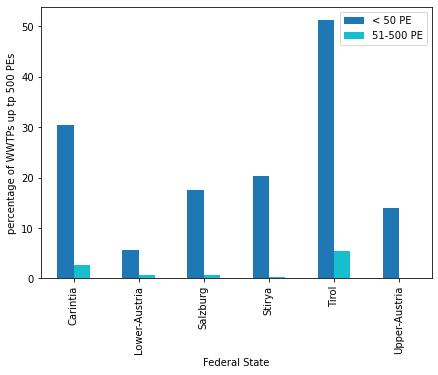

In [153]:
#% of non nitrifying infra and not nitirifie PE
fig, ax= plt.subplots(1, figsize=(7,5))
data_BL.plot(kind='bar', y=['%BL_nonitri_small','%BL_nonitri_medium'],x='BL',
                    stacked=False, 
                    colormap='tab10',ax=ax)
plt.ylabel('percentage of WWTPs up tp 500 PEs')
plt.xlabel('Federal State')
#ax.set_title('percentage of non-nitrifying'.capitalize() +' WWTPS up to 500 PEs by federal state')
ax.legend(legend_labels)
#ax.get_legend().remove()

plt.savefig('graphs/%nonitri.png', bbox_inches='tight')

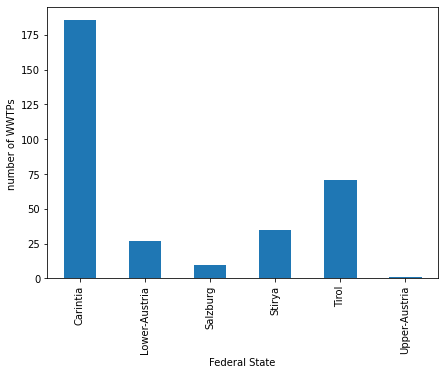

In [154]:
#% of non nitrifying infra and not nitirifie PE
fig, ax= plt.subplots(1, figsize=(7,5))
data_BL.plot(kind='bar', y=['no_nitri_medium'],x='BL',
                    stacked=False, 
                    colormap='tab10',ax=ax)
plt.ylabel('number of WWTPs ')
plt.xlabel('Federal State')
#ax.set_title('number of non-nitrifying'.capitalize() +' medium WWTPS up to 500 PEs by federal state')
ax.legend(['non-nitrifying WWTPs'], title='% of ', title_fontsize='x-large', fontsize='large')
ax.get_legend().remove()

plt.savefig('graphs/freq_nonitri_medium.png', bbox_inches='tight')

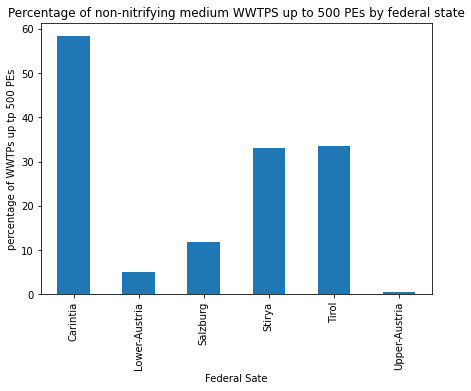

In [155]:
#% of non nitrifying infra and not nitirifie PE
fig, ax= plt.subplots(1, figsize=(7,5))
data_BL.plot(kind='bar', y=['%BL_nonitri_medium_excl'],x='BL',
                    stacked=False, 
                    colormap='tab10',ax=ax)
plt.ylabel('percentage of WWTPs up tp 500 PEs')
plt.xlabel('Federal Sate')
ax.set_title('percentage of non-nitrifying'.capitalize() +' medium WWTPS up to 500 PEs by federal state')
ax.legend(['non-nitrifying WWTPs'], title='% of ', title_fontsize='x-large', fontsize='large')
ax.get_legend().remove()

plt.savefig('graphs/%nonitri_medium_excl.png', bbox_inches='tight')

<BarContainer object of 6 artists>

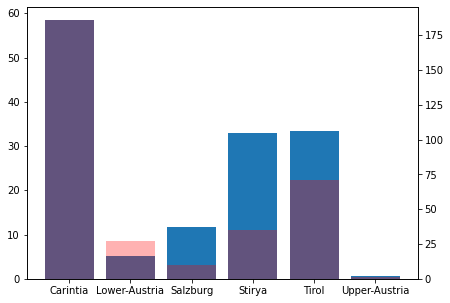

In [156]:
#% of non nitrifying infra and not nitirifie PE
fig, ax= plt.subplots(1, figsize=(7,5))


ax.bar(data_BL['BL'],data_BL['%BL_nonitri_medium_excl'])
ax.twinx().bar('BL','no_nitri_medium', color='r',data=data_BL,alpha=0.3)

# get population

In [157]:
#aadding POP variable 
pop=pd.read_excel('DATA/einwohnerzahl_nach_ortschaften_1.1.2021_gebietsstand_1.1.2021.xlsx', header=1)
pop.rename(columns={'Ortschaftsname':'KG','Gemeindename':'PG','Bundesland':'BL','Bevölkerung\nam 1.1.2021':'Pop'},inplace=True)
#merge on BL
pop=pop.groupby('BL').sum().reset_index()
pop.drop(index=4,inplace=True)
pop=pop[['BL','Pop']]
#rename BLS
pop.replace({'Oberösterreich':'Upper-Austria','Steiermark':'Stirya','Niederösterreich':'Lower-Austria','Tirol':'Tirol','Kärnten':'Carintia',}, inplace=True)
BL=data.groupby('BL').sum().reset_index()
pop_BL=pd.merge(BL,pop,on='BL', how='outer')
pop_BL.loc['Total']= pop_BL.sum()
pop_BL['Pop_coverage']=pop_BL.sum_PE_tot/pop_BL.Pop*100
pop_BL['Pop_coverage_no_nitri']=pop_BL.PE_nonitri_tot/pop_BL.Pop*100
pop_BL.loc['Total','BL']='Austria'




In [158]:
pop_BL['Pop_coverage_small']=pop_BL.sum_PE_small/pop_BL.Pop*100
pop_BL['Pop_coverage_medium']=pop_BL.sum_PE_medium/pop_BL.Pop*100
pop_BL['Pop_coverage_no_nitri_small']=pop_BL.PE_nonitri_small/pop_BL.Pop*100
pop_BL['Pop_coverage_no_nitri_medium']=pop_BL.PE_nonitri_medium/pop_BL.Pop*100

In [159]:

pop_BL.drop(index=[6,7,8], inplace=True)

# pop coverage

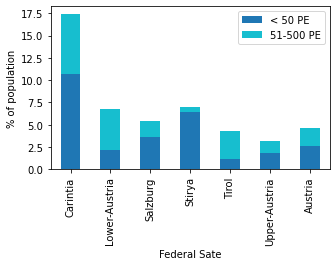

In [160]:
fig, ax= plt.subplots(1, figsize=(5,3))
pop_BL.plot(kind='bar', y=['Pop_coverage_small','Pop_coverage_medium'],x='BL',
                    stacked=True, 
                    colormap='tab10',ax=ax)
                    
plt.ylabel('% of population')
plt.xlabel('Federal Sate')
ax.legend(legend_labels)
#ax.set_title('Percentage of population covered by'.capitalize() +' WWTPs up to 500 PEs by federal state')
plt.savefig('graphs/%pop_BL.png', bbox_inches='tight')


# pop coverage no nitri


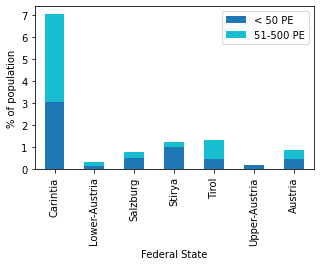

In [161]:
#% of non nitrifying infra and not nitirifie PE
fig, ax= plt.subplots(1, figsize=(5,3))
pop_BL.plot(kind='bar', y=['Pop_coverage_no_nitri_small','Pop_coverage_no_nitri_medium'],x='BL',
                    stacked=True, 
                    colormap='tab10',ax=ax)
plt.ylabel('% of population')
plt.xlabel('Federal State')
ax.legend(legend_labels)
#ax.set_title('percentage of population covered by non-nitrifying'.capitalize() +' WWTPS by federal state')
plt.savefig('graphs/%popnonitri_BL.png', bbox_inches='tight')


# graphs of unified dataset VS original Gunter
### freq, tech_type, PE

# comparing own numbers with OWAV

In [162]:
small=data[data.PE<=50]
medium=data[data.PE>50]

AttributeError: 'GeoDataFrame' object has no attribute 'PE'

In [ ]:
print(len(small), 'number of WWTPS')
print(small.PE.sum(),'total capacity')
print(small.PE.sum()/1000000,'total capacity in million PE')
print(small.PE.sum()/21000000, '% contribution national total')

27607 number of WWTPS
260587 total capacity
0.260587 total capacity in million PE
0.012408904761904762 % contribution national total


In [ ]:
print(len(medium), 'number of WWTPS')
print(medium.PE.sum(),'total capacity')
print(medium.PE.sum()/1000000,'total capacity in million PE')
print(medium.PE.sum()/21000000, '% contribution national total')

1279 number of WWTPS
181596 total capacity
0.181596 total capacity in million PE
0.008647428571428572 % contribution national total
